# Analise exploratoire des données

In [100]:
import os
import glob
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

# Obtenir la date actuelle au format YYYYMMDD
current_date = datetime.now().strftime("%Y%m%d")

# Spécifier le chemin du dossier "backup"
backup_dir = 'backup'

# Vérifier si le dossier "backup" existe
if not os.path.exists(backup_dir):
    print(f"Le dossier {backup_dir} n'existe pas. Veuillez le créer et y ajouter des fichiers.")
    exit()

# Rechercher tous les fichiers correspondant au format "properties_db_*.csv" dans le dossier backup
file_pattern = os.path.join(backup_dir, "properties_db_*.csv")
files = glob.glob(file_pattern)

if files:
    # Filtrer pour trouver un fichier de la date courante ou le plus récent
    current_date_pattern = os.path.join(backup_dir, f"properties_db_{current_date}.csv")
    if current_date_pattern in files:
        latest_file = current_date_pattern
        print(f"Fichier correspondant à la date courante trouvé : {latest_file}")
    else:
        # Si aucun fichier pour la date courante, sélectionner le fichier le plus récent
        latest_file = max(files, key=os.path.getmtime)
        print(f"Aucun fichier pour la date courante. Dernier fichier disponible : {latest_file}")

    # Charger le fichier CSV dans un DataFrame
    try:
        df_properties = pd.read_csv(latest_file)
        print("Fichier importé avec succès.")
        print(df_properties.info())  # Informations sur le DataFrame
    except Exception as e:
        print(f"Erreur lors de la lecture du fichier {latest_file}: {e}")
else:
    print("Aucun fichier disponible dans le dossier 'backup'.")

Fichier correspondant à la date courante trouvé : backup/properties_db_20241230.csv
Fichier importé avec succès.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103779 entries, 0 to 103778
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   _id                103779 non-null  int64  
 1   add_date           103779 non-null  object 
 2   city               103779 non-null  object 
 3   description        103779 non-null  object 
 4   longitude          103779 non-null  float64
 5   latitude           103779 non-null  float64
 6   price              103779 non-null  float64
 7   type               103779 non-null  object 
 8   municipal_taxes    103779 non-null  float64
 9   school_taxes       103779 non-null  float64
 10  construction_year  76706 non-null   float64
 11  surface            78594 non-null   float64
 12  region             103344 non-null  object 
 13  vendue             103751 non-null  

/var/folders/xz/ddgf0yhx2878l5_5hjcr9rp00000gn/T/ipykernel_31218/1283027436.py:36: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df_properties = pd.read_csv(latest_file)


## Répartition des types de propriétés

Afficher la répartition des propriétés en fonction de leur type :

type
Maison                        40169
Condo                         17149
Inconnu                       10330
Duplex                         7747
Lot for sale                   5992
House for sale                 5175
Triplex                        4785
Terrain                        3550
Quadruplex                     2295
Condo for sale                 1752
Maison en copropriété           876
Chalet                          798
Quintuplex                      502
Duplex for sale                 393
Cottage for sale                344
Fermette                        336
Ferme                           318
Land for sale                   302
Triplex for sale                238
Mobile home for sale            198
Quadruplex for sale             147
Hobby farm for sale             121
Condominium house for sale      106
Loft / Studio for sale           90
Quintuplex for sale              57
Terre                             6
Maison mobile                     3
Name: count, dtype: int

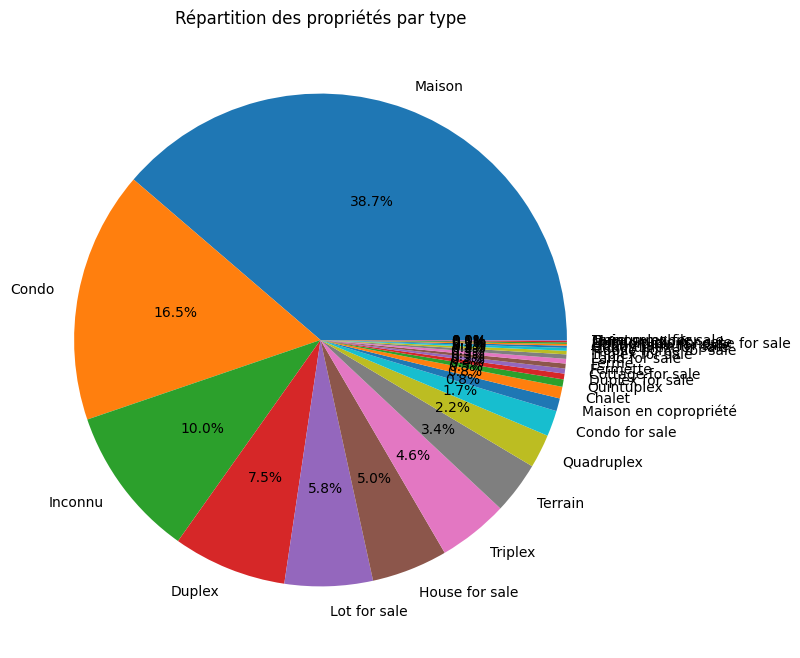

In [101]:
# Compter le nombre de propriétés par type
property_type_counts = df_properties['type'].value_counts()

# Afficher les résultats
print(property_type_counts)

# Visualiser avec un graphique en secteurs
import matplotlib.pyplot as plt

property_type_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), title='Répartition des propriétés par type')
plt.ylabel('')
plt.show()

In [102]:
property_type_counts.index

Index(['Maison', 'Condo', 'Inconnu', 'Duplex', 'Lot for sale',
       'House for sale', 'Triplex', 'Terrain', 'Quadruplex', 'Condo for sale',
       'Maison en copropriété', 'Chalet', 'Quintuplex', 'Duplex for sale',
       'Cottage for sale', 'Fermette', 'Ferme', 'Land for sale',
       'Triplex for sale', 'Mobile home for sale', 'Quadruplex for sale',
       'Hobby farm for sale', 'Condominium house for sale',
       'Loft / Studio for sale', 'Quintuplex for sale', 'Terre',
       'Maison mobile'],
      dtype='object', name='type')

In [103]:
# Dictionnaire de mappage pour regrouper les types de propriétés similaires
type_vers_categorie = {
    # Appartement/Condo
    "Condo": "Appartement/Condo",
    "Maison en copropriété": "Appartement/Condo",
    "Condo for sale": "Appartement/Condo",
    "Condominium house for sale": "Appartement/Condo",
    "Loft / Studio for sale": "Appartement/Condo",
    
    # Autres
    "Inconnu": "Autres",
    
    # Fermes et propriétés agricoles
    "Fermette": "Fermes et propriétés agricoles",
    "Ferme": "Fermes et propriétés agricoles",
    "Hobby farm for sale": "Fermes et propriétés agricoles",
    
    # Maison individuelle
    "Maison": "Maison individuelle",
    "Chalet": "Maison individuelle",
    "Cottage for sale": "Maison individuelle",
    "Maison mobile": "Maison individuelle",
    "Mobile home for sale": "Maison individuelle",
    
    # Multilogement
    "Duplex": "Multilogement",
    "Triplex": "Multilogement",
    "Quadruplex": "Multilogement",
    "Quintuplex": "Multilogement",
    "Duplex for sale": "Multilogement",
    "Triplex for sale": "Multilogement",
    "Quadruplex for sale": "Multilogement",
    "Quintuplex for sale": "Multilogement",
    
    # Terrain
    "Lot for sale": "Terrain",
    "Terrain": "Terrain",
    "Land for sale": "Terrain",
    "Terre": "Terrain",
}

# Fonction pour mapper les types de propriétés en catégories
# Appliquer le mappage pour regrouper les types de propriétés en catégories
df_properties['category'] = df_properties['type'].map(type_vers_categorie).fillna('Autres')

# Vérifier les résultats
print(df_properties['category'].value_counts())

category
Maison individuelle               41512
Appartement/Condo                 19973
Multilogement                     16164
Autres                            15505
Terrain                            9850
Fermes et propriétés agricoles      775
Name: count, dtype: int64


### Vérifier la répartition par catégorie

Après regroupement, afficher la répartition des catégories principales :

category
Maison individuelle               41512
Appartement/Condo                 19973
Multilogement                     16164
Autres                            15505
Terrain                            9850
Fermes et propriétés agricoles      775
Name: count, dtype: int64


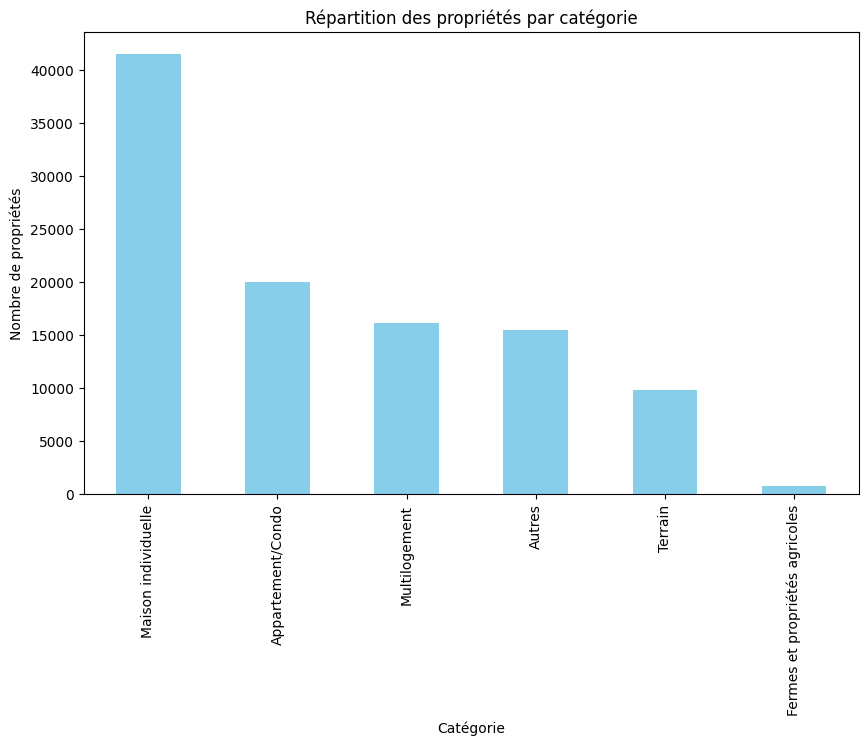

In [104]:
# Répartition par catégorie
category_counts = df_properties['category'].value_counts()

print(category_counts)

# Visualisation
category_counts.plot(kind='bar', figsize=(10, 6), title="Répartition des propriétés par catégorie", color='skyblue')
plt.ylabel("Nombre de propriétés")
plt.xlabel("Catégorie")
plt.show()

### Répartition des propriétés par région

category
Maison individuelle               41512
Appartement/Condo                 19973
Multilogement                     16164
Autres                            15505
Terrain                            9850
Fermes et propriétés agricoles      775
Name: count, dtype: int64


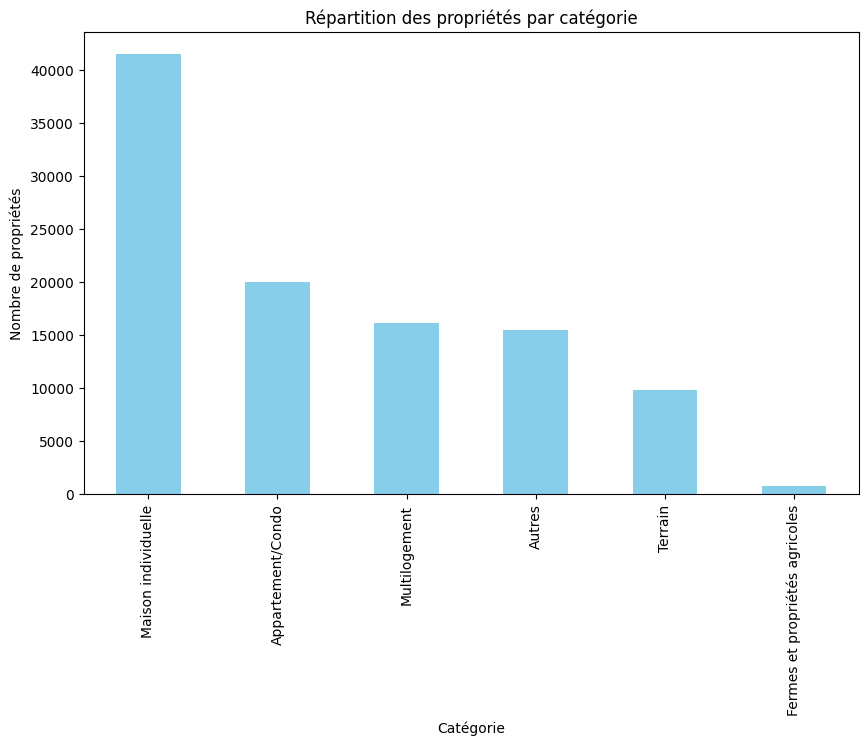

In [105]:
# Répartition par catégorie
category_counts = df_properties['category'].value_counts()

print(category_counts)

# Visualisation
category_counts.plot(kind='bar', figsize=(10, 6), title="Répartition des propriétés par catégorie", color='skyblue')
plt.ylabel("Nombre de propriétés")
plt.xlabel("Catégorie")
plt.show()

### Proportion des propriétés par région (en %)

region
Montréal (Île)          38302
Montérégie              18628
Laurentides             11987
Lanaudière               9685
Estrie                   8263
Chaudière-Appalaches     7064
Laval                    5529
Mauricie                 3886
Name: count, dtype: int64


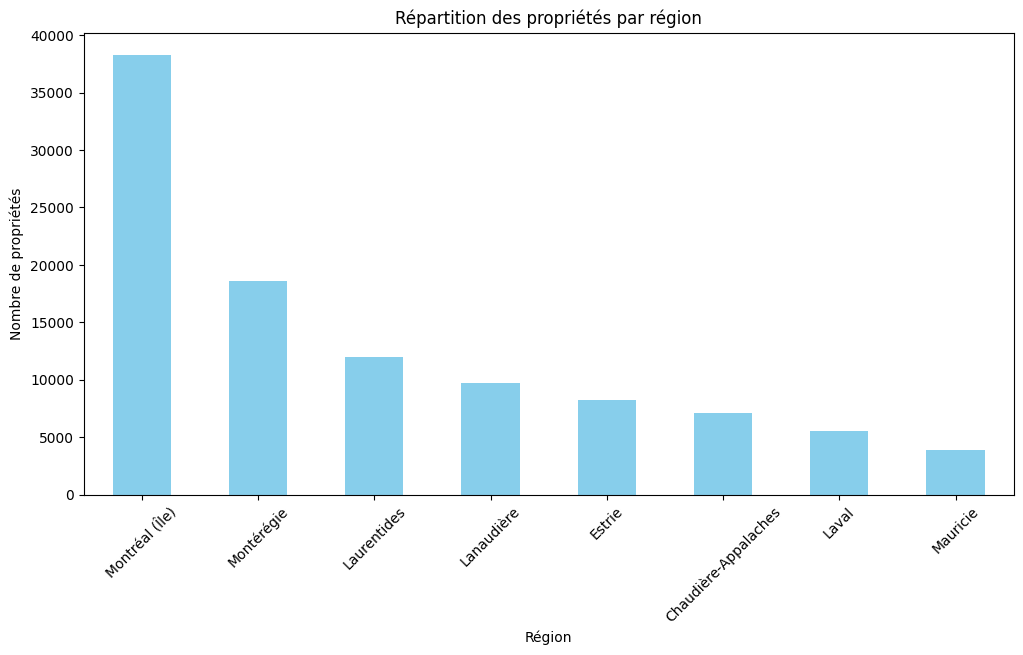

In [106]:
# Calculer le nombre de propriétés par région
region_distribution = df_properties['region'].value_counts()

# Afficher les résultats
print(region_distribution)

# Graphique en barres
region_distribution.plot(kind='bar', figsize=(12, 6), color='skyblue', title="Répartition des propriétés par région")
plt.ylabel("Nombre de propriétés")
plt.xlabel("Région")
plt.xticks(rotation=45)
plt.show()

In [107]:
# Proportion en %
region_distribution_percentage = (region_distribution / region_distribution.sum()) * 100

# Afficher les résultats
print(region_distribution_percentage)

region
Montréal (Île)          37.062626
Montérégie              18.025236
Laurentides             11.599125
Lanaudière               9.371613
Estrie                   7.995626
Chaudière-Appalaches     6.835423
Laval                    5.350093
Mauricie                 3.760257
Name: count, dtype: float64


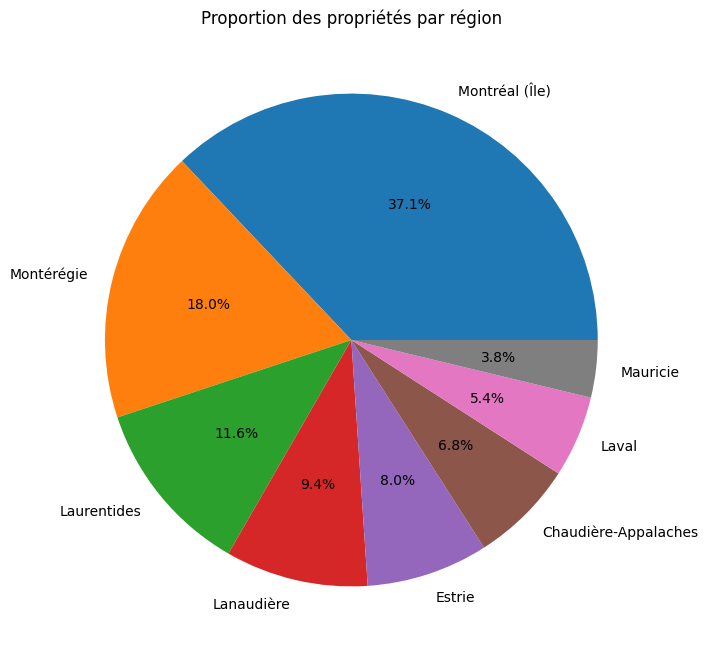

In [108]:
# Graphique en camembert
region_distribution_percentage.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', title="Proportion des propriétés par région")
plt.ylabel("")  # Supprimer l'étiquette "region"
plt.show()

## Visualisation des catégories de propriétés par region

category              Appartement/Condo  Autres  \
region                                            
Chaudière-Appalaches                394     671   
Estrie                              649    1750   
Lanaudière                         1058     733   
Laurentides                        2049     603   
Laval                              1503     474   
Mauricie                            157     266   
Montréal (Île)                    11470    6473   
Montérégie                         2693    4456   

category              Fermes et propriétés agricoles  Maison individuelle  \
region                                                                      
Chaudière-Appalaches                              74                 3749   
Estrie                                            98                 3453   
Lanaudière                                        91                 5351   
Laurentides                                       80                 6042   
Laval                      

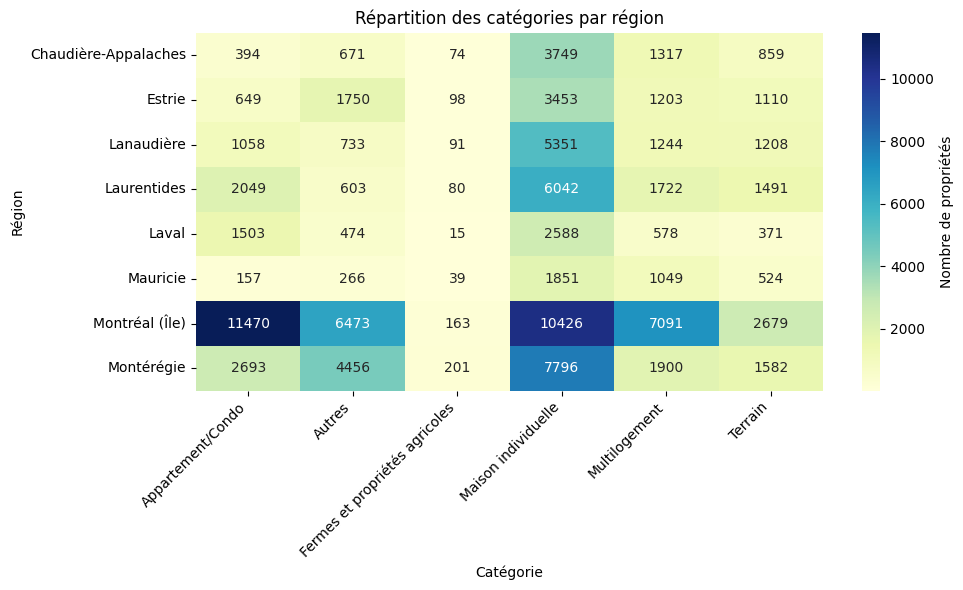

In [109]:
# Tableau croisé dynamique pour observer les catégories dans chaque région
region_category_distribution = pd.crosstab(df_properties['region'], df_properties['category'])

# Afficher les résultats
print(region_category_distribution)

# Exporter la distribution par région
region_distribution.to_csv("region_distribution.csv", index=True)
region_category_distribution.to_csv("region_category_distribution.csv")
print("Répartition des catégories par région exportée dans 'region_category_distribution.csv'.")

# Créer une heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(region_category_distribution, annot=True, fmt="d", cmap="YlGnBu", cbar_kws={"label": "Nombre de propriétés"})
plt.title("Répartition des catégories par région")
plt.xlabel("Catégorie")
plt.ylabel("Région")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Afficher le graphique
plt.show()

### Visualisation des résultats (heatmap) :

category              Appartement/Condo  Autres  \
region                                            
Chaudière-Appalaches                394     671   
Estrie                              649    1750   
Lanaudière                         1058     733   
Laurentides                        2049     603   
Laval                              1503     474   
Mauricie                            157     266   
Montréal (Île)                    11470    6473   
Montérégie                         2693    4456   

category              Fermes et propriétés agricoles  Maison individuelle  \
region                                                                      
Chaudière-Appalaches                              74                 3749   
Estrie                                            98                 3453   
Lanaudière                                        91                 5351   
Laurentides                                       80                 6042   
Laval                      

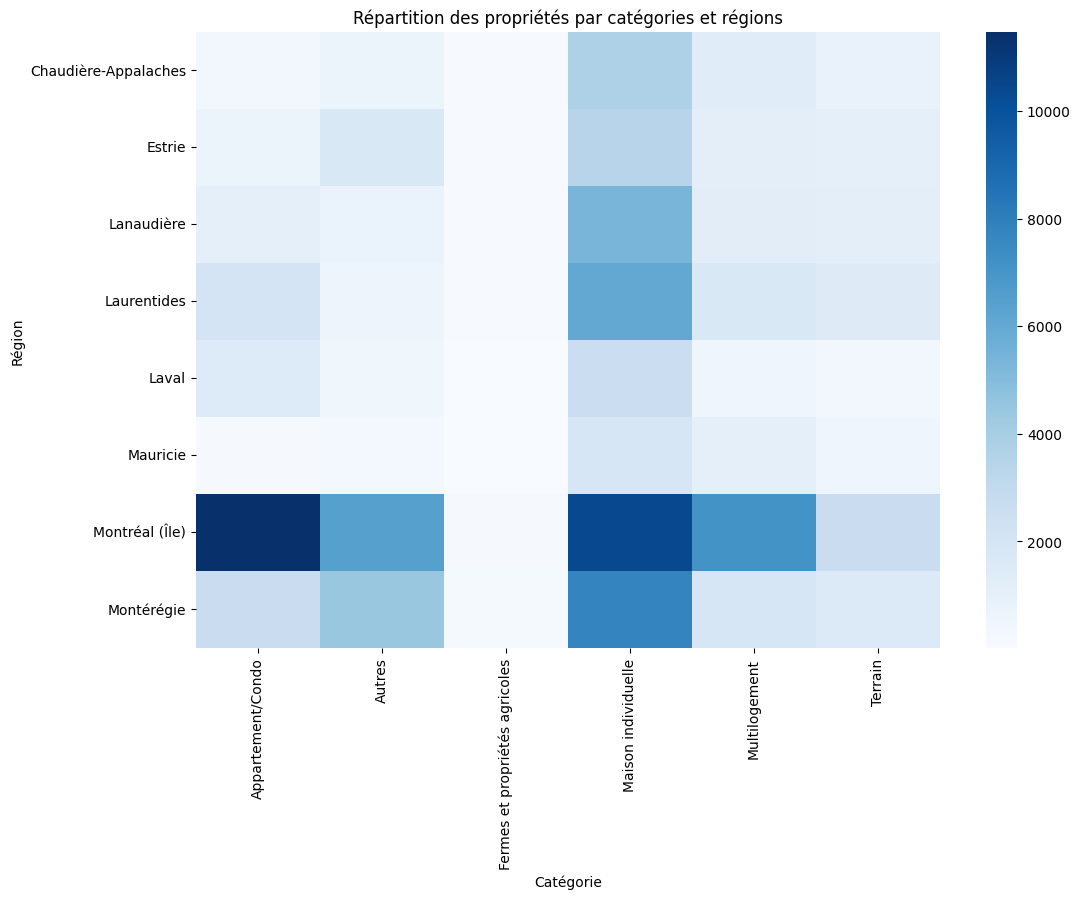

In [110]:

# Tableau croisé dynamique pour observer les catégories dans chaque région
region_category_distribution = pd.crosstab(df_properties['region'], df_properties['category'])

# Afficher les résultats
print(region_category_distribution)

# Exporter la distribution par région
region_distribution.to_csv("region_distribution.csv", index=True)
region_category_distribution.to_csv("region_category_distribution.csv")
print("Répartition des catégories par région exportée dans 'region_category_distribution.csv'.")


# Heatmap de la répartition
plt.figure(figsize=(12, 8))
sns.heatmap(region_category_distribution, cmap="Blues", annot=False, cbar=True)
plt.title("Répartition des propriétés par catégories et régions")
plt.ylabel("Région")
plt.xlabel("Catégorie")
plt.show()

region
Montréal (Île)    38302
Montérégie        18628
Laurentides       11987
Lanaudière         9685
Estrie             8263
Name: count, dtype: int64


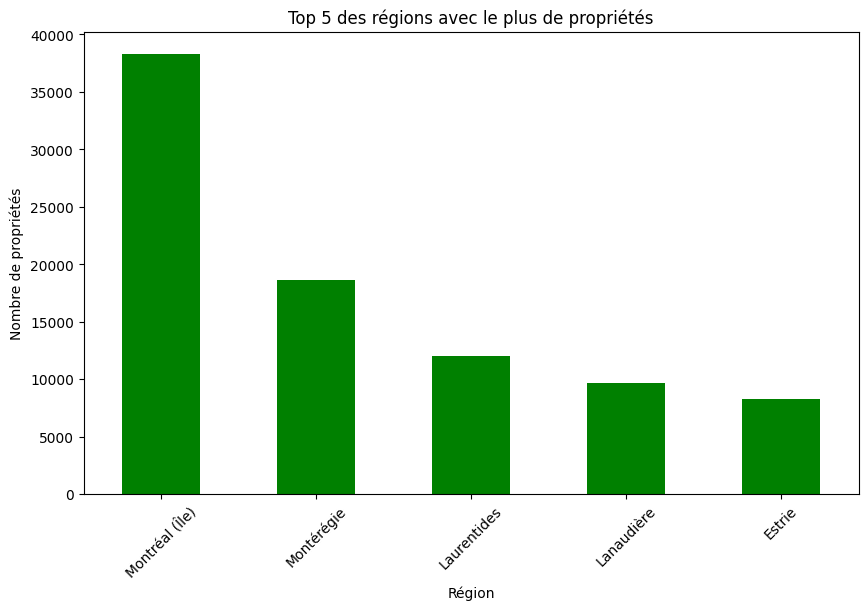

In [111]:
# Trier les régions par le nombre de propriétés
top_regions = region_distribution.head(5)

# Afficher les régions principales
print(top_regions)

# Visualiser les 10 principales régions
top_regions.plot(kind='bar', figsize=(10, 6), color='green', title="Top 5 des régions avec le plus de propriétés")
plt.ylabel("Nombre de propriétés")
plt.xlabel("Région")
plt.xticks(rotation=45)
plt.show()

### Explorer les caractéristiques des propriétés dans une région spécifique

region
Montréal (Île)    38302
Montérégie        18628
Laurentides       11987
Lanaudière         9685
Estrie             8263
Name: count, dtype: int64


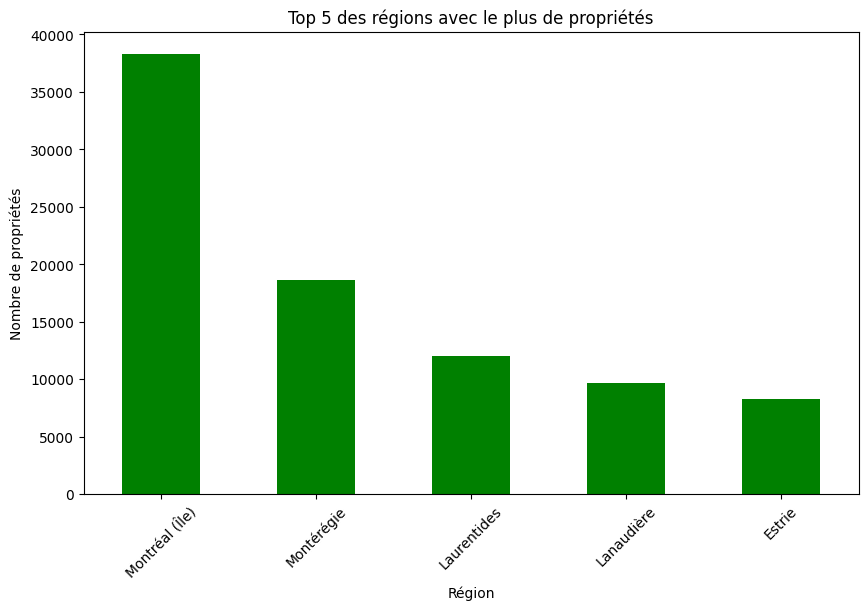

In [112]:
# Trier les régions par le nombre de propriétés
top_regions = region_distribution.head(5)

# Afficher les régions principales
print(top_regions)

# Visualiser les 10 principales régions
top_regions.plot(kind='bar', figsize=(10, 6), color='green', title="Top 5 des régions avec le plus de propriétés")
plt.ylabel("Nombre de propriétés")
plt.xlabel("Région")
plt.xticks(rotation=45)
plt.show()

                _id    longitude     latitude         price  municipal_taxes  \
count  3.886000e+03  3886.000000  3886.000000  3.886000e+03      3886.000000   
mean   1.907494e+07   -72.598429    46.660967  3.959794e+05      1093.256519   
std    5.677574e+06     1.363055     0.737017  3.546069e+05      1946.356238   
min    9.005906e+06   -79.228284    45.096336  5.000000e-01         0.000000   
25%    1.417679e+07   -72.882005    46.343357  1.999990e+05         0.000000   
50%    1.910516e+07   -72.690682    46.453648  3.000000e+05         0.000000   
75%    2.392491e+07   -72.546756    46.622312  4.600000e+05      2103.750000   
max    2.898456e+07   -67.421389    49.970904  4.900000e+06     22098.000000   

       school_taxes  construction_year       surface   nb_bedroom  nb_bathroom  
count   3886.000000        2900.000000  3.023000e+03  1431.000000  1440.000000  
mean      64.401478        1967.769655  5.340778e+04     3.129280     1.863194  
std      140.778336          36.3738

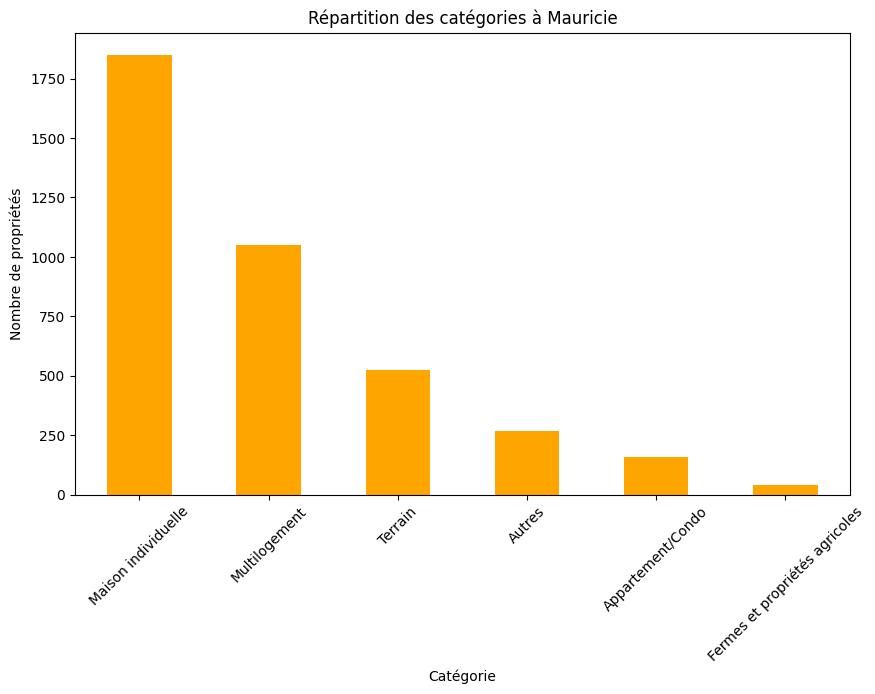

In [113]:
# Filtrer les propriétés pour une région spécifique
region= 'Mauricie'
region_specific = df_properties[df_properties['region'] == region]

# Statistiques descriptives
print(region_specific.describe())

# Répartition des types de propriétés dans cette région
type_distribution_in_region = region_specific['category'].value_counts()
print(type_distribution_in_region)

# Visualisation
type_distribution_in_region.plot(kind='bar', figsize=(10, 6), color='orange', title=f"Répartition des catégories à {region}")
plt.ylabel("Nombre de propriétés")
plt.xlabel("Catégorie")
plt.xticks(rotation=45)
plt.show()

### Exporter la distribution pour la région

                _id    longitude     latitude         price  municipal_taxes  \
count  3.886000e+03  3886.000000  3886.000000  3.886000e+03      3886.000000   
mean   1.907494e+07   -72.598429    46.660967  3.959794e+05      1093.256519   
std    5.677574e+06     1.363055     0.737017  3.546069e+05      1946.356238   
min    9.005906e+06   -79.228284    45.096336  5.000000e-01         0.000000   
25%    1.417679e+07   -72.882005    46.343357  1.999990e+05         0.000000   
50%    1.910516e+07   -72.690682    46.453648  3.000000e+05         0.000000   
75%    2.392491e+07   -72.546756    46.622312  4.600000e+05      2103.750000   
max    2.898456e+07   -67.421389    49.970904  4.900000e+06     22098.000000   

       school_taxes  construction_year       surface   nb_bedroom  nb_bathroom  
count   3886.000000        2900.000000  3.023000e+03  1431.000000  1440.000000  
mean      64.401478        1967.769655  5.340778e+04     3.129280     1.863194  
std      140.778336          36.3738

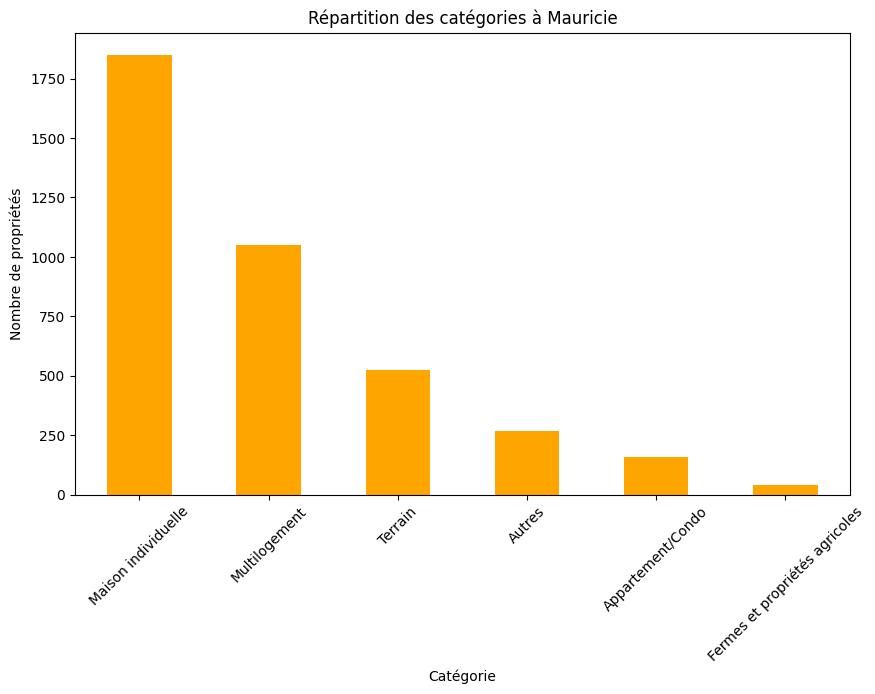

In [114]:
# Filtrer les propriétés pour une région spécifique
region= 'Mauricie'
region_specific = df_properties[df_properties['region'] == region]

# Statistiques descriptives
print(region_specific.describe())

# Répartition des types de propriétés dans cette région
type_distribution_in_region = region_specific['category'].value_counts()
print(type_distribution_in_region)

# Visualisation
type_distribution_in_region.plot(kind='bar', figsize=(10, 6), color='orange', title=f"Répartition des catégories à {region}")
plt.ylabel("Nombre de propriétés")
plt.xlabel("Catégorie")
plt.xticks(rotation=45)
plt.show()

### Analysons une catégorie spécifique dans une région particulière, voici une démarche détaillée. Prenons comme exemple la région "***Montréal (Île)***" et la catégorie "***Appartement/condo***" :

In [115]:
# Exporter la distribution par région
region_distribution.to_csv(f"region_{region}_distribution.csv", index=True)
# Exporter la distribution par région et par catégorie
region_category_distribution.to_csv("region_category_distribution.csv")

print(f"Données exportées dans 'region_{region}_distribution.csv' et 'region_{region}_category_distribution.csv'.")

Données exportées dans 'region_Mauricie_distribution.csv' et 'region_Mauricie_category_distribution.csv'.


### Statistiques descriptives pour cette catégorie dans la région

In [116]:
# Définir la région et la catégorie
region_name = region  # Remplacez par la région souhaitée
category_name = "Multilogement"  # Remplacez par la catégorie souhaitée

# Filtrer les données
filtered_data = df_properties[(df_properties['region'] == region_name) & (df_properties['category'] == category_name)]

# Afficher les premières lignes et le nombre total
print(filtered_data.head())
print(f"Nombre total de propriétés pour la catégorie '{category_name}' dans la région '{region_name}' : {len(filtered_data)}")

           _id    add_date         city  \
25    28509350  2024-08-11   Yamachiche   
26    13536308  2024-07-30  Louiseville   
1594  25104056  2024-08-11   Shawinigan   
1595  12270257  2024-08-11   Shawinigan   
1597  21576517  2024-07-30   Shawinigan   

                                            description  longitude   latitude  \
25    Duplex à vendre à Yamachiche, Mauricie, 350 - ... -72.799366  46.294252   
26    Duplex for sale in Louiseville, Mauricie, 381 ... -72.946971  46.258421   
1594  Quadruplex à vendre à Shawinigan, Mauricie, 62... -72.692003  46.614556   
1595  Triplex à vendre à Shawinigan, Mauricie, 21 - ... -72.684621  46.620005   
1597  Quadruplex à vendre à Shawinigan, Mauricie, 39... -72.732217  46.505803   

         price        type  municipal_taxes  school_taxes  construction_year  \
25    299900.0      Duplex           2399.0         133.0             1943.0   
26    249900.0      Duplex              0.0           0.0                NaN   
1594  425000.0

#### Uniformiser les données dans la colonne

In [117]:
# Statistiques descriptives pour les colonnes numériques
stats = filtered_data[['price', 'surface', 'municipal_taxes', 'school_taxes', 'construction_year', 'nb_bedroom', 'nb_bathroom']].describe()

# Afficher les statistiques descriptives
print(stats)

              price        surface  municipal_taxes  school_taxes  \
count  1.049000e+03     940.000000      1049.000000   1049.000000   
mean   3.294342e+05    6960.283155      1894.960196     89.684461   
std    1.857224e+05   17613.324423      2370.272880    189.247885   
min    5.000000e+04       0.000000         0.000000      0.000000   
25%    2.150000e+05    2179.000000         0.000000      0.000000   
50%    2.850000e+05    4511.000000       307.000000     20.000000   
75%    3.890000e+05    6570.250000      3386.000000    130.000000   
max    1.899000e+06  437505.000000     22098.000000   2500.000000   

       construction_year  nb_bedroom  nb_bathroom  
count         939.000000  250.000000   253.000000  
mean         1942.100106    2.332000     1.173913  
std            30.747555    0.930181     0.564660  
min          1847.000000    1.000000     1.000000  
25%          1920.000000    2.000000     1.000000  
50%          1942.000000    2.000000     1.000000  
75%          1

In [118]:
# Convertir toutes les valeurs en booléen
filtered_data['vendue'] = filtered_data['vendue'].map(lambda x: str(x).lower() == 'true')

# Vérifier les valeurs uniques après la conversion
print(filtered_data['vendue'].unique())

[ True False]


/var/folders/xz/ddgf0yhx2878l5_5hjcr9rp00000gn/T/ipykernel_31218/3281030758.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['vendue'] = filtered_data['vendue'].map(lambda x: str(x).lower() == 'true')


In [119]:
filtered_data['vendue'].unique()

array([ True, False])

In [120]:
# Convertir toutes les valeurs en booléen
filtered_data['vendue'] = filtered_data['vendue'].map(lambda x: str(x).lower() == 'true')

# Vérifier les valeurs uniques après la conversion
print(filtered_data['vendue'].unique())

[ True False]


/var/folders/xz/ddgf0yhx2878l5_5hjcr9rp00000gn/T/ipykernel_31218/3281030758.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['vendue'] = filtered_data['vendue'].map(lambda x: str(x).lower() == 'true')


In [121]:
# Filtrer les propriétés situées à Montréal et non vendues
montreal_data = filtered_data[
    (df_properties['vendue'] == False)# Propriétés non vendues
]

# Afficher un aperçu des données filtrées
print(f"Nombre de propriétés en vente sur l'île de Montréal : {len(montreal_data)}")
print(montreal_data.head())

Nombre de propriétés en vente sur l'île de Montréal : 87
            _id    add_date         city  \
65732  12986798  2024-09-30  Louiseville   
65802  28902169  2024-09-30   Shawinigan   
66243  20522151  2024-09-30   Shawinigan   
66622  15055511  2024-09-30   Shawinigan   
66844  19633716  2024-09-30   Shawinigan   

                                             description  longitude  \
65732  Triplex à vendre à Louiseville, Mauricie, 49 -... -72.943657   
65802  Quadruplex à vendre à Shawinigan, Mauricie, 18... -72.744857   
66243  Duplex à vendre à Shawinigan, Mauricie, 430 - ... -72.699070   
66622  Quintuplex à vendre à Shawinigan, Mauricie, 30... -72.746247   
66844  Duplex à vendre à Shawinigan, Mauricie, 5833 -... -72.725143   

        latitude     price        type  municipal_taxes  school_taxes  \
65732  46.256617  329000.0     Triplex              0.0           0.0   
65802  46.561971  299500.0  Quadruplex              0.0           0.0   
66243  46.622309  179000.0      

/var/folders/xz/ddgf0yhx2878l5_5hjcr9rp00000gn/T/ipykernel_31218/226250872.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  montreal_data = filtered_data[


vendue
True     909
False    140
Name: count, dtype: int64


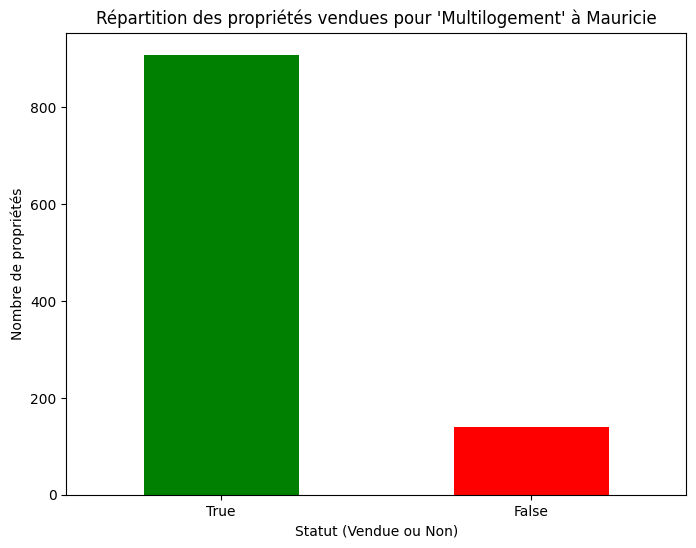

In [122]:
# Répartition des propriétés vendues ou non
vendue_counts = filtered_data['vendue'].value_counts()

# Afficher les résultats
print(vendue_counts)

# Graphique en barres
vendue_counts.plot(kind='bar', figsize=(8, 6), color=['green', 'red'], title=f"Répartition des propriétés vendues pour '{category_name}' à {region_name}")
plt.ylabel("Nombre de propriétés")
plt.xlabel("Statut (Vendue ou Non)")
plt.xticks(rotation=0)
plt.show()

In [123]:
# Filtrer les propriétés situées à Montréal et non vendues
montreal_data = filtered_data[
    (df_properties['vendue'] == False)# Propriétés non vendues
]

# Afficher un aperçu des données filtrées
print(f"Nombre de propriétés en vente sur l'île de Montréal : {len(montreal_data)}")
print(montreal_data.head())

Nombre de propriétés en vente sur l'île de Montréal : 87
            _id    add_date         city  \
65732  12986798  2024-09-30  Louiseville   
65802  28902169  2024-09-30   Shawinigan   
66243  20522151  2024-09-30   Shawinigan   
66622  15055511  2024-09-30   Shawinigan   
66844  19633716  2024-09-30   Shawinigan   

                                             description  longitude  \
65732  Triplex à vendre à Louiseville, Mauricie, 49 -... -72.943657   
65802  Quadruplex à vendre à Shawinigan, Mauricie, 18... -72.744857   
66243  Duplex à vendre à Shawinigan, Mauricie, 430 - ... -72.699070   
66622  Quintuplex à vendre à Shawinigan, Mauricie, 30... -72.746247   
66844  Duplex à vendre à Shawinigan, Mauricie, 5833 -... -72.725143   

        latitude     price        type  municipal_taxes  school_taxes  \
65732  46.256617  329000.0     Triplex              0.0           0.0   
65802  46.561971  299500.0  Quadruplex              0.0           0.0   
66243  46.622309  179000.0      

/var/folders/xz/ddgf0yhx2878l5_5hjcr9rp00000gn/T/ipykernel_31218/226250872.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  montreal_data = filtered_data[


### Variation des prix d'année en année

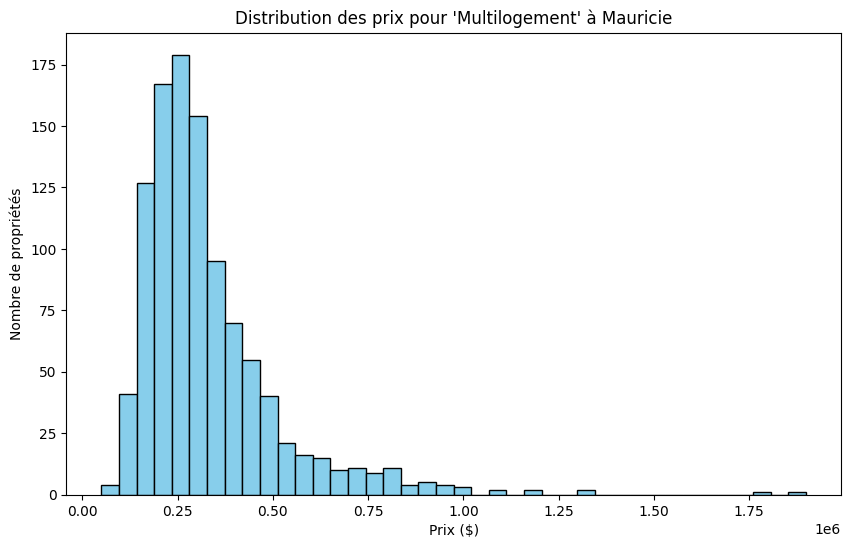

In [124]:
# Distribution des prix
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['price'], bins=40, color='skyblue', edgecolor='black')
plt.title(f"Distribution des prix pour '{category_name}' à {region_name}")
plt.xlabel("Prix ($)")
plt.ylabel("Nombre de propriétés")
plt.show()

### Calculer le prix moyen par année

In [125]:
# Extraire l'année et le mois de la colonne add_date
filtered_data['year'] = pd.to_datetime(filtered_data['add_date']).dt.year

filtered_data['month'] = pd.to_datetime(filtered_data['add_date']).dt.month

# Vérifier les premières lignes
print(filtered_data[['add_date', 'year','month']].head())

        add_date  year  month
25    2024-08-11  2024      8
26    2024-07-30  2024      7
1594  2024-08-11  2024      8
1595  2024-08-11  2024      8
1597  2024-07-30  2024      7


/var/folders/xz/ddgf0yhx2878l5_5hjcr9rp00000gn/T/ipykernel_31218/3742989005.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['year'] = pd.to_datetime(filtered_data['add_date']).dt.year
/var/folders/xz/ddgf0yhx2878l5_5hjcr9rp00000gn/T/ipykernel_31218/3742989005.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['month'] = pd.to_datetime(filtered_data['add_date']).dt.month


### Variation de la moyenne des prix

In [126]:
# Grouper par année et mois, et calculer les statistiques
price_trends = filtered_data.groupby(['year','month'])['price'].agg(['mean', 'median', 'min', 'max', 'count']).reset_index()

# Afficher les premières lignes
print(price_trends.head())

   year  month           mean    median       min       max  count
0  2023      2  251063.496855  239000.0   98000.0  499000.0    159
1  2023      4  277138.461538  259250.0   95000.0  499000.0     78
2  2023      5  314693.814815  285000.0   99000.0  899000.0     81
3  2023      6  277986.792453  259000.0  132000.0  499000.0     53
4  2023      7  298445.454545  329000.0  139500.0  389000.0     11


### Variation de la médiane des prix par année et mois

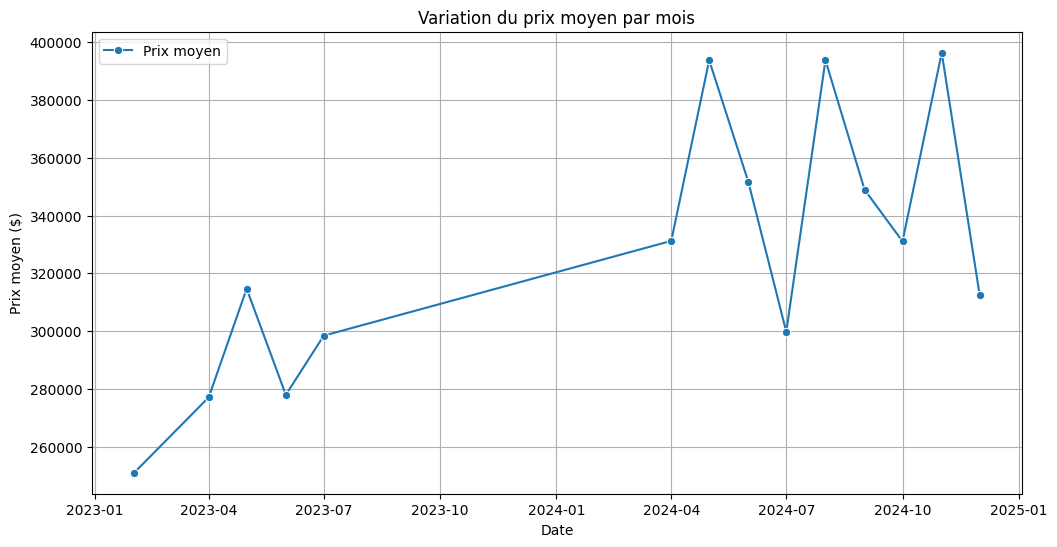

In [127]:
import seaborn as sns

# Préparer les données pour un graphique temporel
price_trends['date'] = pd.to_datetime(price_trends[['year','month']].assign(day=1))

# Visualisation de la moyenne des prix
plt.figure(figsize=(12, 6))
sns.lineplot(data=price_trends, x='date', y='mean', marker='o', label='Prix moyen')
plt.title('Variation du prix moyen par mois')
plt.xlabel('Date')
plt.ylabel('Prix moyen ($)')
plt.grid(True)
plt.legend()
plt.show()

### Afficher des indicateurs comme la médiane, le minimum et le maximum 

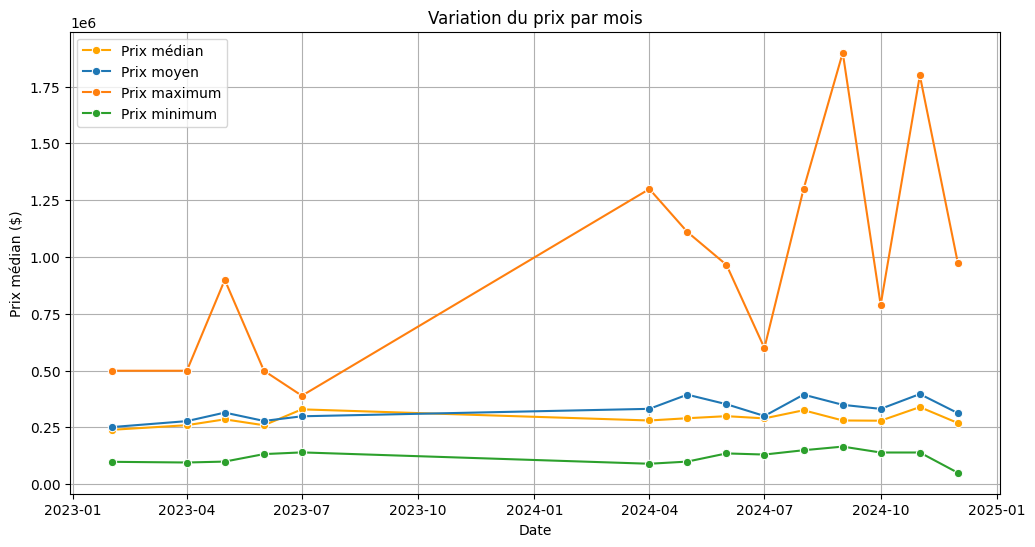

In [128]:
# Visualisation de la médiane des prix
plt.figure(figsize=(12, 6))
sns.lineplot(data=price_trends, x='date', y='median', marker='o', color='orange', label='Prix médian')
sns.lineplot(data=price_trends, x='date', y='mean', marker='o', label='Prix moyen')
sns.lineplot(data=price_trends, x='date', y='max', marker='o', label='Prix maximum')
sns.lineplot(data=price_trends, x='date', y='min', marker='o', label='Prix minimum')
plt.title('Variation du prix par mois')
plt.xlabel('Date')
plt.ylabel('Prix médian ($)')
plt.grid(True)
plt.legend()
plt.show()